In [19]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
# read data

df_test = pd.read_csv('test_set_value.csv')
df_trainig_set_labels = pd.read_csv('training_set_labels.csv')
df_training_set_values = pd.read_csv('training_set_values.csv')  


In [21]:
# to view all features

def display_all(df):
    with pd.option_context('display.max_rows',50):
        with pd.option_context('display.max_columns', 1000):
            display(df)
            

In [5]:
# initial preview 

display_all(df_training_set_values.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [ ]:
# generate a profile report of the data to examine

profile = df.profile_report()
profile.to_file("your_report.html")

In [ ]:
### exploratory data analysis

In [ ]:
# correlation between region/district
pd.options.display.max_rows = 100
df_training_set_values.groupby(['region', 'region_code']).size()

In [38]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['extraction_type', 'extraction_type_group', 'extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1770
cemo                       other motorpump        motorpump                   90
climax                     other motorpump        motorpump                   32
gravity                    gravity                gravity                  26780
india mark ii              india mark ii          handpump                  2400
india mark iii             india mark iii         handpump                    98
ksb                        submersible            submersible               1415
mono                       mono                   motorpump                 2865
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

In [3]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

In [4]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['payment', 'payment_type']).size()

payment                payment_type
never pay              never pay       25348
other                  other            1054
pay annually           annually         3642
pay monthly            monthly          8300
pay per bucket         per bucket       8985
pay when scheme fails  on failure       3914
unknown                unknown          8157
dtype: int64

In [5]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

In [6]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['quantity', 'quantity_group']).size()

quantity      quantity_group
dry           dry                6246
enough        enough            33186
insufficient  insufficient      15129
seasonal      seasonal           4050
unknown       unknown             789
dtype: int64

In [7]:
# correlation between features
pd.options.display.max_rows = 100
df_training_set_values.groupby(['source', 'source_class', 'source_type']).size()

source                source_class  source_type         
dam                   surface       dam                       656
hand dtw              groundwater   borehole                  874
lake                  surface       river/lake                765
machine dbh           groundwater   borehole                11075
other                 unknown       other                     212
rainwater harvesting  surface       rainwater harvesting     2295
river                 surface       river/lake               9612
shallow well          groundwater   shallow well            16824
spring                groundwater   spring                  17021
unknown               unknown       other                      66
dtype: int64

In [ ]:
### VISUALIZATION

# distribution depending on the target parameter 

In [6]:
# create train set for visualization
df_train_viz = df_training_set_values.set_index('id').join(df_trainig_set_labels)

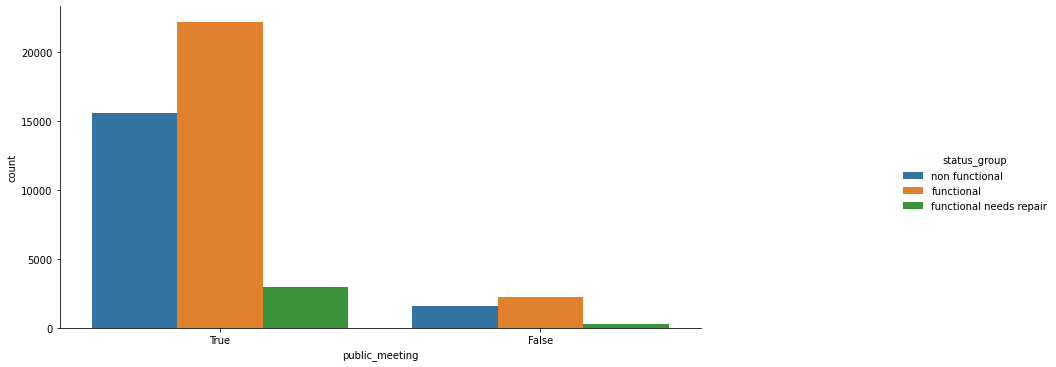

In [26]:

pic =sns.catplot(x="public_meeting",  hue="status_group", kind="count", data=df_train_viz)
pic.fig.set_size_inches(16,5)

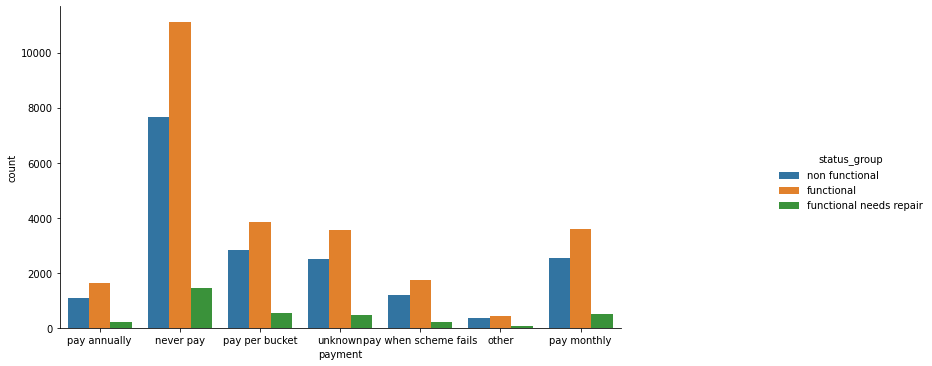

In [20]:

pic = sns.catplot(x="payment",  hue="status_group", kind="count", data=df_train_viz)
pic.fig.set_size_inches(14,5)

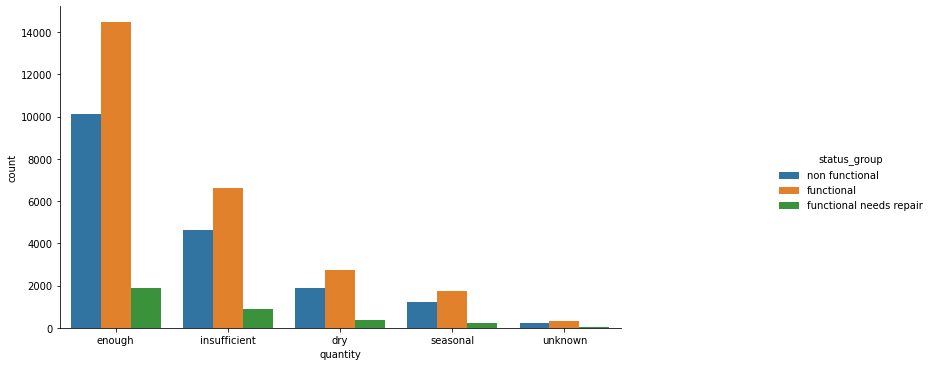

In [21]:
pic = sns.catplot(x="quantity",  hue="status_group", kind="count", data=df_train_viz)
pic.fig.set_size_inches(14,5)

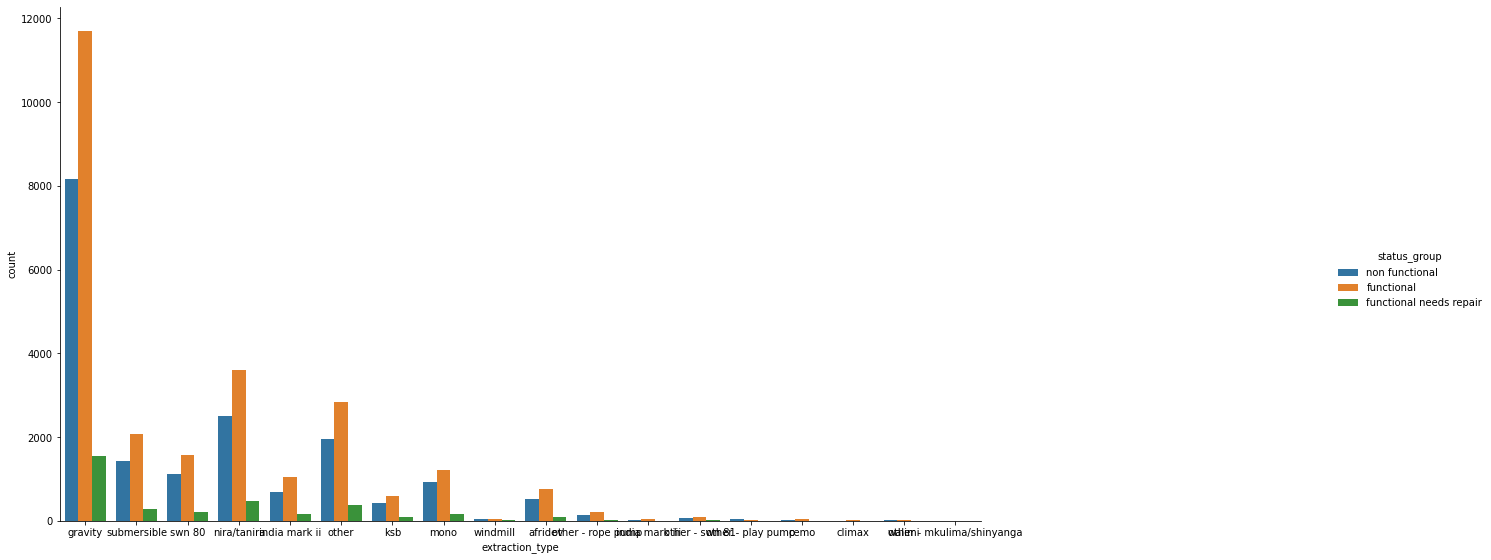

In [29]:
pic = sns.catplot(x="extraction_type",  hue="status_group", kind="count", data=df_train_viz)
pic.fig.set_size_inches(23,8)